<a href="https://colab.research.google.com/github/MtFeather/AI-and-Security/blob/master/tensorflow/Keras_Mnist_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras - MNIST 手寫數字辨識使用 CNN

對於深度學習來說資料的蒐集是十分重要的，而Mnist是一個別人已經蒐集好的手寫數字辨識資料，為了方便，我們就先使用別人蒐集好的資料來進行使用。

---



### STEP 1. 宣告要使用到的函式庫

In [0]:
from keras.datasets import mnist    # 匯入 keras 的 MNIST 資料庫
from keras.utils import np_utils    # 匯入 Keras 的 Numpy 工具
import numpy as np                  # 匯入 Numpy
np.random.seed(10)                  # 設定隨機種子, 以便每次執行結果相同

Using TensorFlow backend.


### STEP 2. 資料預先處理

訓練集有 60000 個; 測試集有 10000 個，第二與第三元素表示此二維陣列因次為 28x28，分別為 x 軸與 y 軸畫素個數. 用索引即可取得圖片內容

In [0]:
(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()    # 讀入Mnist資料

接著是呼叫 reshape() 函數將陣列轉換成 float32 浮點數，reshape() 需傳入 4 個參數 : 第一參數仍是陣列元素個數, 第二與第三參數是二維陣列之因次 (即列與行解析度), 第四參數是色版數目, 因 MNIST 資料集是單色灰階, 故傳入 1

In [0]:
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')    # 將28x28的圖片矩陣轉為784個數字(將28x28的圖片轉為矩陣)
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

 一樣是用除以畫素最大值 255 的方法將圖片正規化 (Normalization), 亦即 0~255 的像素值就全部變成 0~1 之值了

In [0]:
x_Train4D_normalize = x_Train4D / 255    # 將資料正規化
x_Test4D_normalize = x_Test4D / 255

np_utils.to_categorical() 函數將 0~9 的數值經過 One-hot encoding 編碼 (獨熱編碼) 轉成 10 位元二進碼, 例如 5 變成  0000010000

In [0]:
y_TrainOneHot = np_utils.to_categorical(y_Train)    # 28*28將圖片歸類為0~9的數字
y_TestOneHot = np_utils.to_categorical(y_Test)

### STEP 3. 建立 CNN 模型


接下來是利用 Keras 的線性堆疊模型 Sequential 一層層地建構 CNN 卷積神經網路與其分類模型. 首先須匯入 Sequential 模組, 平面卷積模組 Conv2D, 平面池化模組 MaxPooling2D, 完全連接模組 Dense, 以及放棄模組 Dropout 

![替代文字](https://2.bp.blogspot.com/-lo4ANmafiQM/WVpEeo68VPI/AAAAAAAAWxE/7FJBUGp-GrQFL5fUYEg6tQAJWXUHrtgWgCLcBGAs/s1600/3812_1.png)

In [0]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [0]:
model = Sequential()    # 建立空的線性堆疊模組

然後呼叫 Sequential() 建立空的模型物件, 再用其 add() 方法將卷積層 1 與池化層 1, 使用 16 個5x5 的隨機卷積核心 (濾鏡), 以 "same" 邊界模式將一張 28x28 圖片產生 16 層 28x28 圖片 (same 方式不改變影像大小), 並使用 ReLu 非線性函數激活, 然後用 2x2 的池化核心將其解析度降為 14x14

In [0]:
model.add(Conv2D(filters=16,               # 加入卷積層 1 (16 個隨機卷積核心)
                 kernel_size=(5,5),        # 卷積核心尺寸 5*5
                 padding='same',           # 邊界模式=same (填補=0, 步幅=1)
                 input_shape=(28,28,1),    # 輸入圖片為 28*28 單色
                 activation='relu'))       # 激活函數=ReLu (softmax, elu, selu, softplus, softsign, relu, tanh, sigmoid, hard_sigmoid, linear)

線性整流函數（Rectified Linear Unit, ReLU）,又稱修正線性單元, 是一種人工神經網絡中常用的激活函數（activation function），通常指代以斜坡函數及其變種為代表的非線性函數

![線性整流函數](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c9/Ramp_function.svg/325px-Ramp_function.svg.png)

In [0]:
model.add(MaxPooling2D(pool_size=(2, 2)))    # 加入池化層 1 (池化核心 2*2)

然後加入卷積層 2 與池化層 2, 使用 36 個5x5 的隨機卷積核心 (濾鏡), 以 "same" 邊界模式從 16 層之 14x14 圖片產生 36 層的 14x14 圖片 (same 方式不改變影像大小), 並使用 ReLu 非線性函數激活, 然後用 2x2 的池化核心將其解析度降為 7x7

In [0]:
model.add(Conv2D(filters=36,            # 加入卷積層 2 (36 個隨機卷積核心)
                 kernel_size=(5,5),     # 卷積核心尺寸 5*5
                 padding='same',        # 邊界模式=same (填補=0, 步幅=1)
                 activation='relu'))    # 激活函數=ReLu

In [0]:
model.add(MaxPooling2D(pool_size=(2, 2)))    # 加入池化層 2 (池化核心 2*2)

接下來為了避免過擬合 (Over fitting) 問題, 最後加上 Dropout 層在每次訓練中放棄部分神經元

In [0]:
model.add(Dropout(0.25))    # 放棄 25% 神經元

### STEP 4. 建立分類模型

上面經過 CNN 網路學習得到之圖像空間特徵需經過分類模型辨識圖片屬於 0~9 的哪一個, 使用的分類模型是之前的 MLP 多層感知器, MLP 為全連接網路, 是 DNN (Deep Neural Network) 網路的一種

MLP 分類模型為三層模型:
  1. 平坦層
  2. 隱藏層
  3. 輸出層

首先呼叫 Flatten() 建立平坦層, 由於前面 CNN 模型最後池化層 2 之輸出為 36 層的 7*7 圖像, 因此平坦層會將其依序拉平展開為 36*7*7=1764 個一維特徵向量 (畫素), 並建立 1764 個神經元來接收這些特徵值

In [0]:
model.add(Flatten())    # 建立平坦層 (36*7*7=1764 個神經元)

其次呼叫 Dense() 建立隱藏層, 具有 128 個以 ReLu 為激活函數的神經元. 同樣地為避免過擬合, 在隱藏層後面會加上一個 Dropout 層, 此處設為 0.5 表示在每次訓練時會放棄 50% 的神經元

In [0]:
model.add(Dense(128, activation='relu'))    # 建立隱藏層 (128 個神經元)

In [0]:
model.add(Dropout(0.5))    # 放棄 50% 神經元

最後呼叫 Dense() 建立輸出層, 具有 10 個以 Softmax 為激活函數之輸出神經元, 其 One-hot 的 0/1 輸出代表 0~9 之數字識別結果 

In [0]:
model.add(Dense(10,activation='softmax'))     # 建立輸出層 (10 個神經元)

> softmax 函數將 K 維的實數向量壓縮（映射）成另一個 K 維的實數向量，其中向量中的每個元素取值都介於 (0，1) 之間。常用於多分類問題

> ![softmax](https://wikimedia.org/api/rest_v1/media/math/render/svg/e348290cf48ddbb6e9a6ef4e39363568b67c09d3)

### STEP 5. 顯示模型摘要

In [0]:
print(model.summary())     # 顯示摘要

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

### STEP 6. 進行神經元訓練

模型建好後即可進行訓練 (使用 60000 筆訓練集), 訓練前須呼叫 compile() 函數進行設定 

In [0]:
model.compile(loss='categorical_crossentropy',    # loss : 損失函數使用交叉熵
              optimizer='adam',                   # optimizer : 訓練時之最佳化方法使用 "adam" (快速收斂且準確度高)
              metrics=['accuracy'])               # metrics : 評估模型之方式為 "accuracy" (準確度)

設定好訓練參數後即可呼叫 fit() 函數開始訓練, 方式是從 60000 筆訓練集中取 80% (48000 筆) 做訓練, 20% (12000 筆) 做驗證, 共執行 20 次訓練週期 (epoches), 每次訓練時並非一次將 48000 訓練集全部丟進去, 而是分批次, 每批次取 300 筆資料, 因此 48000 筆要分 160 批次才完成一個epoch (訓練週期 )

In [0]:
train_history=model.fit(x=x_Train4D_normalize,       # x=正規化後的 28*28 圖片特徵向量
                        y=y_TrainOneHot,             # y=One-hot 編碼的圖片標籤 (答案)
                        validation_split=0.2,        # validation_split=驗證資料集占訓練集之比率
                        epochs=20,                   # epochs=訓練週期
                        batch_size=300,              # batch_size=每一批次之資料筆數
                        verbose=2)                   # verbose=顯示選項 (2=顯示訓練過程)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 73s - loss: 0.4896 - acc: 0.8470 - val_loss: 0.0975 - val_acc: 0.9721
Epoch 2/20
 - 73s - loss: 0.1421 - acc: 0.9579 - val_loss: 0.0639 - val_acc: 0.9801
Epoch 3/20
 - 73s - loss: 0.1031 - acc: 0.9689 - val_loss: 0.0513 - val_acc: 0.9841
Epoch 4/20
 - 72s - loss: 0.0842 - acc: 0.9749 - val_loss: 0.0456 - val_acc: 0.9857
Epoch 5/20
 - 73s - loss: 0.0722 - acc: 0.9777 - val_loss: 0.0404 - val_acc: 0.9873
Epoch 6/20
 - 73s - loss: 0.0644 - acc: 0.9807 - val_loss: 0.0392 - val_acc: 0.9889
Epoch 7/20
 - 72s - loss: 0.0556 - acc: 0.9833 - val_loss: 0.0419 - val_acc: 0.9870
Epoch 8/20
 - 72s - loss: 0.0513 - acc: 0.9846 - val_loss: 0.0327 - val_acc: 0.9903
Epoch 9/20
 - 72s - loss: 0.0449 - acc: 0.9863 - val_loss: 0.0337 - val_acc: 0.9903
Epoch 10/20
 - 72s - loss: 0.0413 - acc: 0.9872 - val_loss: 0.0330 - val_acc: 0.9903
Epoch 11/20
 - 73s - loss: 0.0409 - acc: 0.9875 - val_loss: 0.0323 - val_acc: 0.9906
Epoch 12/20
 - 73s - los

透過matplotlib 函數來繪製訓練紀錄, 描繪誤差值 (loss) 與準確度 (acc) 隨 epoch 變化的情形

In [0]:
import matplotlib.pyplot as plt                       # 匯入matplotlib.pyplot模組
def show_train_history(train_acc,test_acc):           # 宣告函數名稱為"show_train_history，並且有兩個參數(train_acc,test_acc)
    plt.plot(train_history.history[train_acc])        # 第一個線數值
    plt.plot(train_history.history[test_acc])         # 第二個線數值
    plt.title('Train History')                        # 圖示抬頭
    plt.ylabel('Accuracy')                            # y軸的名稱
    plt.xlabel('Epoch')                               # x軸的名稱
    plt.legend(['train', 'test'], loc='upper left')   # 圖例
    plt.show()                                        # 顯示圖表

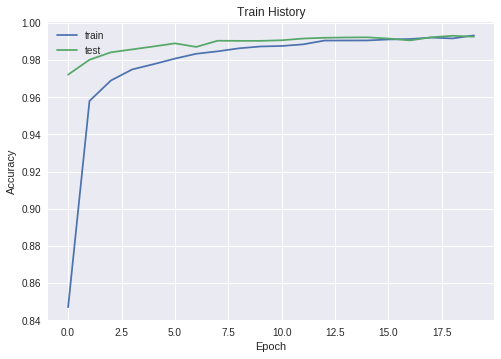

In [0]:
show_train_history('acc','val_acc')    # 顯示train與test dataset訓練過程的準確率

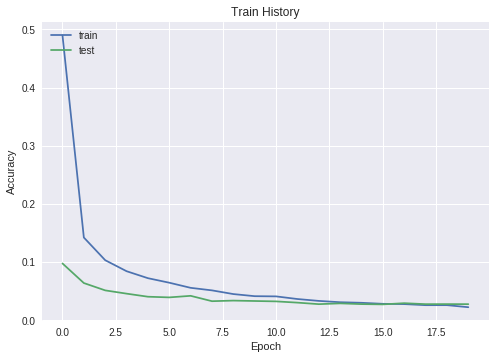

In [0]:
show_train_history('loss','val_loss')    # 顯示train與test dataset訓練過程的誤差率

### STEP 7. 評估模型準確率

 60000 筆訓練集完成模型的 20 個訓練週期後, 最後的準確度可達 99%, 接下來可呼叫 evaluate() 函數來評估此訓練過的模型對 10000 筆測試集之準確度有多少 ? 傳入參數為測試集之正規化數字圖片以及其 onehot 編碼之標籤, 傳回值型態為串列, 其中準確率放在索引 1

In [0]:
scores = model.evaluate(x_Test4D_normalize , y_TestOneHot)
scores[1]

10000/10000 [==============================] - 6s 571us/step


0.9932

### STEP 8. 預測結果

呼叫 predict_classes() 傳入正規化後的測試集陣列 (10000 筆資料) 進行預測, 結果會放在一個陣列中傳回

In [0]:
prediction=model.predict_classes(x_Test4D_normalize)

In [0]:
prediction[:10]    # 列出10筆

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

透過matplotlib製作圖示顯示預測結果,  一樣寫成函數方便呼叫

In [0]:
import matplotlib.pyplot as plt                                            # 匯入matplotlib.pyplot模組
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):    # 定義函數名稱與參數
    fig = plt.gcf()                                                        # 得到當前的 figure
    fig.set_size_inches(12, 14)                                            # 設定圖片大小
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)                                           # 使用plt.subplot來創建小圖. plt.subplot(5,5,1+i)表示將整個圖像窗口分為5行5列, 當前位置為1+i
        ax.imshow(images[idx], cmap='binary')                              # 將數字或代碼利用matplotlib包對圖片進行繪製, images[]為代入的數字,camp是顏色

        ax.set_title("label=" +str(labels[idx])+                           # 設定小圖的抬頭與字體大小
                     ",predict="+str(prediction[idx])
                     ,fontsize=10) 
        
        ax.set_xticks([]);ax.set_yticks([])                                # 不顯示x,y刻度
        idx+=1 
    plt.show()                                                             # 顯示圖片

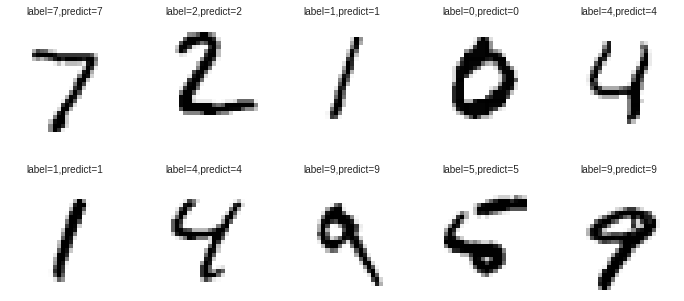

In [0]:
plot_images_labels_prediction(x_Test,y_Test,prediction,idx=0)

### STEP 9. 顯示混淆矩陣

使用 pandas 套件的 crosstab() 函數可用來建立混淆矩陣以觀察那些數字比較會被誤認, 傳入參數為測試集的 10000 個標籤 (答案) y_test_label 以及上面得到預測結果 prediction

In [0]:
import pandas as pd
pd.crosstab(y_Test,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,976,1,0,0,0,0,1,1,1,0
1,0,1130,1,0,0,1,1,1,1,0
2,1,0,1026,0,1,0,0,2,2,0
3,0,0,0,1004,0,4,0,0,2,0
4,0,0,0,0,975,0,1,0,2,4
5,1,0,0,4,0,883,3,0,0,1
6,2,2,0,0,2,1,950,0,1,0
7,0,2,2,1,0,0,0,1018,1,4
8,1,0,1,2,0,0,0,0,967,3


從對角線來看, 5 的辨識率最低, 只有 883 次, 最容易被混淆; 而 1 的辨識率最高, 達 1130 次. 另外, 4,5,7 最容易被誤認為 9 達4次

### STEP 10. 利用 DataFrame 找出哪些測試樣本被誤認

可以利用 pandas 的 DataFrame 找出被誤認的測試樣本是哪些索引, 首先將測試集標籤 y_test_label 與預測結果 prediction 組成 DataFrame 物件, 利用欄位的條件式即可找出被誤認的測試樣本

In [0]:
df = pd.DataFrame({'label':y_Test, 'predict':prediction})

In [0]:
df[(df.label==5)&(df.predict==3)]   # 標籤為 5 被誤認為 3 者 (4 次) 

,label,predict
1393,5,3
2369,5,3
2597,5,3
5937,5,3
